**LOADING AND DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/apooyadv/Datasets/FPP/Data_Train.csv')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [5]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

/tmp/ipykernel_21092/4070106596.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.drop(['Route','Dep_Time', 'Arrival_Time'],axis=1,inplace=True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,2h 40m,non-stop,No info,12648


In [9]:
df['Duration(in mins)'] = df.Duration.str.replace('h', '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [10]:
df.drop(['Duration'],axis=1,inplace=True)

In [11]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Duration(in mins)
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,No info,3897,170
1,Air India,2019-05-01,Kolkata,Banglore,2 stops,No info,7662,445
2,Jet Airways,2019-06-09,Delhi,Cochin,2 stops,No info,13882,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,1 stop,No info,6218,325
4,IndiGo,2019-03-01,Banglore,New Delhi,1 stop,No info,13302,285
...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,non-stop,No info,4107,150
10679,Air India,2019-04-27,Kolkata,Banglore,non-stop,No info,4145,155
10680,Jet Airways,2019-04-27,Banglore,Delhi,non-stop,No info,7229,180
10681,Vistara,2019-03-01,Banglore,New Delhi,non-stop,No info,12648,160


In [12]:
import seaborn as sns
sns.set_style('darkgrid')

[Text(0.5, 1.0, 'Duration Vs Price')]

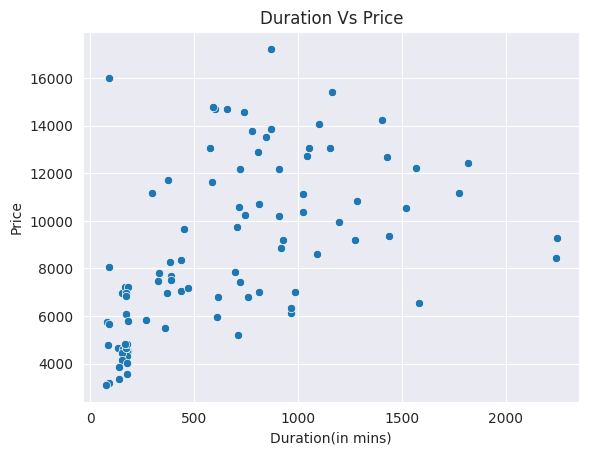

In [13]:
sns.scatterplot(df.sample(100),x='Duration(in mins)',y='Price').set(title='Duration Vs Price')

In [14]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [15]:
df.sort_values(by='Date_of_Journey',inplace=True)

In [16]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Duration(in mins)
785,Air India,2019-03-01,Banglore,New Delhi,2 stops,1 Short layover,26743,875
3535,Air India,2019-03-01,Banglore,New Delhi,1 stop,Change airports,26092,725
5549,SpiceJet,2019-03-01,Kolkata,Banglore,non-stop,No info,4622,160
4765,Jet Airways,2019-03-01,Banglore,New Delhi,1 stop,No info,22270,490
3835,SpiceJet,2019-03-01,Kolkata,Banglore,non-stop,No info,5515,150
...,...,...,...,...,...,...,...,...
8294,IndiGo,2019-06-27,Delhi,Cochin,1 stop,No info,5684,895
8319,Air India,2019-06-27,Delhi,Cochin,2 stops,No info,10441,1275
8332,IndiGo,2019-06-27,Kolkata,Banglore,non-stop,No info,4804,155
8403,Multiple carriers,2019-06-27,Delhi,Cochin,1 stop,No info,13377,840


In [17]:
df['Month'] = pd.to_datetime(df.Date_of_Journey).dt.month

In [18]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration(in mins),Month
785,Air India,Banglore,New Delhi,2 stops,1 Short layover,26743,875,3
3535,Air India,Banglore,New Delhi,1 stop,Change airports,26092,725,3
5549,SpiceJet,Kolkata,Banglore,non-stop,No info,4622,160,3
4765,Jet Airways,Banglore,New Delhi,1 stop,No info,22270,490,3
3835,SpiceJet,Kolkata,Banglore,non-stop,No info,5515,150,3
...,...,...,...,...,...,...,...,...
8294,IndiGo,Delhi,Cochin,1 stop,No info,5684,895,6
8319,Air India,Delhi,Cochin,2 stops,No info,10441,1275,6
8332,IndiGo,Kolkata,Banglore,non-stop,No info,4804,155,6
8403,Multiple carriers,Delhi,Cochin,1 stop,No info,13377,840,6


In [20]:
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Duration(in mins)', 'Month'],
      dtype='object')

In [22]:
df = pd.get_dummies(df,columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']).replace({True:1,False:0})

In [23]:
df

,Price,Duration(in mins),Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
785,26743,875,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3535,26092,725,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5549,4622,160,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4765,22270,490,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3835,5515,150,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294,5684,895,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8319,10441,1275,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8332,4804,155,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8403,13377,840,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df.columns

Index(['Price', 'Duration(in mins)', 'Month', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops_1 stop', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included

In [26]:
X = df[['Duration(in mins)', 'Month', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops_1 stop', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']]
y = df['Price']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=80,train_size=0.75,shuffle=True)

In [28]:
X_train

,Duration(in mins),Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
2196,705,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
330,245,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6096,90,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1635,170,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4602,440,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,1375,6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7314,175,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
170,1355,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1541,170,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y_train

2196     7354
330      8996
6096     2754
1635     4823
4602    11789
        ...  
2093    10368
7314     4377
170      5177
1541     3943
8974    15764
Name: Price, Length: 8012, dtype: int64

**TRAINING THE MODEL WITH RANDOM FORESTS**

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor(n_estimators=50,random_state=80)

In [32]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=80)

In [33]:
preds = model.predict(X_train)

**EVALUATING RMSE FOR TRAIN AND TEST SET**

In [34]:
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

In [35]:
rmse(preds,y_train)

1604.5956206403212

In [36]:
t_preds = model.predict(X_test)

In [37]:
rmse(t_preds,y_test)

2417.3383180295555

**WE GET A LOW RMSE VALUE WHICH MEANS OUR MODEL IS VERY ACCURATE**

**NOW WE'LL JUST COMPARE SOME PREDICTIONS WITH THEIR ACTUAL VALUE**

In [38]:
t_preds

array([10131.23042857, 12722.125     , 12984.14228571, ...,
       10752.22544819,  4668.        ,  2026.61991143])

In [39]:
y_test

4831     10413
2791     12373
6804     13067
4913      8147
4085     12242
         ...  
6620      8052
6935      8040
2532     13377
10659     4668
1652      1965
Name: Price, Length: 2671, dtype: int64

**BY COMPARING THE VALUES WE CAN SEE THAT OUR MODEL HAS A PRETTY GOOD ACCURACY**